<a href="https://colab.research.google.com/github/aacalva/Portafolio/blob/main/iris_Keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elaborado por: Andy Calva

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
#
# Import Keras modules
#
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

# Nueva sección

In [ ]:
# 0='setosa', 1='versicolor', 2='virginica'
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

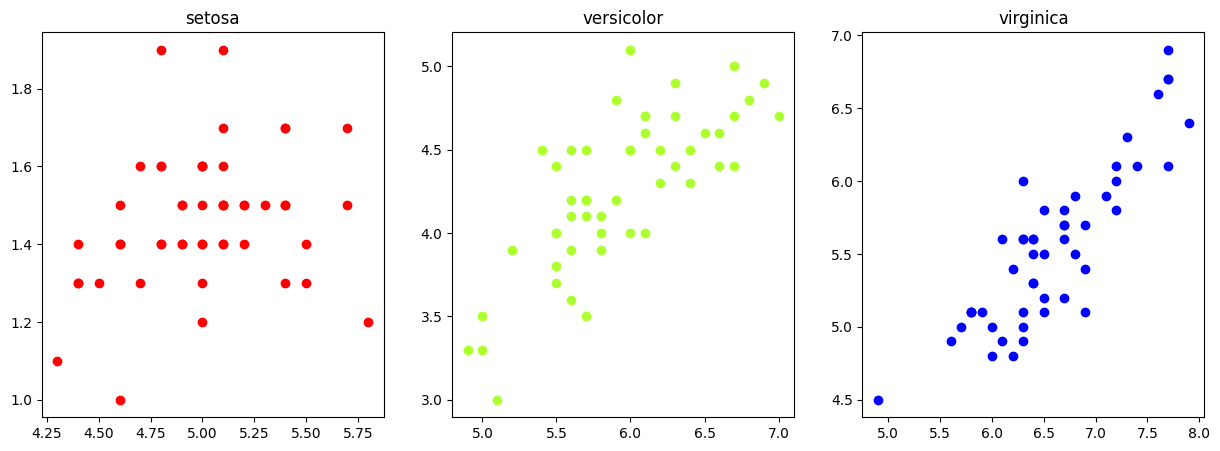

In [ ]:
# prompt: plot iris with colors using iris.data and iris.label

import numpy as np
import matplotlib.pyplot as plt

# The colors corresponding to each class
colors = ['red', 'greenyellow', 'blue']

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each class on a separate subplot
for i, ax in enumerate(axes):
    # Get the indices of data points belonging to the current class
    indices = np.where(y == i)[0]

    # Plot the data points with the corresponding color
    ax.scatter(X[indices, 0], X[indices, 2], color=colors[i])

    # Set the title of the subplot
    ax.set_title(iris.target_names[i])

# Show the plot
plt.show()


In [ ]:
print("Entrada",X[0])
print("Salida",y[0])

Entrada [5.1 3.5 1.4 0.2]
Salida 0


In [ ]:
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
print(train_labels.shape)
print(test_labels.shape)

(120, 3)
(30, 3)


In [ ]:
train_labels

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0

In [ ]:
# Create the network
#
modelo = models.Sequential()
modelo.add(layers.Dense(5, activation='relu', input_shape=(4,)))
modelo.add(layers.Dense(8, activation='relu'))
modelo.add(layers.Dense(6, activation='relu'))
modelo.add(layers.Dense(3, activation='softmax'))
#

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 8)                 48        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 148 (592.00 Byte)
Trainable params: 148 (592.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the network
#
modelo.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy','mean_squared_error'])

In [ ]:
modelo.fit(X_train, train_labels, epochs=100)

In [ ]:

test_loss, test_acc, test_mse = modelo.evaluate(X_test, test_labels)
print('test_acc:', test_acc)


1/1 [==============================] - 0s 191ms/step - loss: 0.3322 - accuracy: 0.9667 - mean_squared_error: 0.0555
test_acc: 0.9666666388511658


In [ ]:
# prompt: Predice con un dato nuevo y pon la etiqueta que correspode
import numpy as np
new_data = np.array([[8, 2.9, 1, 0.2]])

In [ ]:
print(modelo.predict(new_data))
print(np.argmax(modelo.predict(new_data)))

1/1 [==============================] - 0s 323ms/step
[[1.1165042e-02 9.8883456e-01 3.5297975e-07]]
1/1 [==============================] - 0s 20ms/step
1


In [ ]:
# prompt: Predice con un dato nuevo y pon la etiqueta que correspode
import numpy as np
new_data = np.array([[5.2, 8 , 5.1, 1.8]])
predicted_class = np.argmax(modelo.predict(new_data))
print(modelo.predict(new_data))
class_labels = ['setosa', 'versicolor', 'virginica']
print("Predicted class:", class_labels[predicted_class])


1/1 [==============================] - 0s 28ms/step
[[0.9531595  0.00588749 0.040953  ]]
Predicted class: setosa


In [ ]:
modelo.save("iris_model")